
<img src="../../images/brownbear.png" width="400">

## A financial tool that can analyze and maximize investment portfolios on a risk adjusted basis  


<u>Features</u>
- Determines the highest performing Investment Options for each Asset Class, based on risk adjusted returns. 
- Calculates Performance Metrics for User Specified Portfolios
- Optimizes a portfolio for risk adjusted returns with an option to specify the minimum annual return rate

<u>How to guide</u>
- Install anaconda (see https://www.anaconda.com to get Jupter notebook.  Or just install jupyter notebook (see https://jupyter.org/)
- Create a subfolder under 'universe' for your investment options, aka your investment galaxy.  Within that folder, create the files investment-options.csv and asset-classes.csv.  investment-options.csv contains the investment options available for your investment galaxy, or a subset of the options you wish to consider.  asset-options.csv contains additional asset classes for your galaxy, to extend the standard asset classes defined in standard-asset-classes.csv.  As an example, see securian-401k.
- assign the variables investment_universe and risk_free_rate.
- specify custom portfolios using your investment options.
- assign the variable portfolio_option to point to the portfolio you wish to analyze
- run the notebook
- optionally, run the optimizer by setting run_portfolio_optimizer to True

<u>Annual Returns, Risk, and Risk Adjusted Returns</u>
- Annual Returns are the equivalent annual return an investor receives over a given period, expressed as a percentage.
- Risk refers to the degree of uncertainty and/or potential financial loss inherent in an investment, expressed as annualized Standard Deviation of the returns.
- Risk Adjusted Return is a calculation of the profit or potential profit from an investment that takes into account the degree of risk that must be accepted in order to achieve it, expressed as the Sharpe Ratio.  The risk is measured in comparison to that of a virtually risk-free investment. U.S. Treasuries are usually used for comparison.  

<u>Diversification</u>  
"By building a portfolio invested in multiple uncorrelated assets an investor can achieve better returns per unit of risk (Sharpe ratio) due to portfolio diversification".  This is accomplished by choosing investments from different asset classes.

<u>Annualized Returns</u>  
Use 5 year returns because some of the investment option returns are "hypothetical" beyond that, i.e. some of the 10 year mark returns are simulated based on modeling and not real returns.  The funds may not have existed beyond 5 years.  The returns should be already net of expenses, so no need to subtract them.

<u>Risk Free Rate</u>  
"Investors commonly use the interest rate on a three-month U.S. Treasury bill (T-bill) as a proxy for the short-term risk-free rate because short-term government-issued securities have virtually zero risks of default, as they are backed by the full faith and credit of the U.S. government."  If you don't have a short-term treasury option available, then use any investment option in your account that has a guaranteed return with zero (very small) risk.  If no such option exists, then set risk_free_rate to zero, i.e. risk_free_rate=0.  For the sample securian-401k.csv, the risk free option is 'Minnesota Life General Account'.

<u>Standard Asset Classes</u>  
Standard asset class mapping are specified in standard-asset-classes.csv.
- US Stocks- aka equities are stocks and mutual funds, represent shares of ownership in publicly held companies
- Global Stocks - focus on International Equities
- Bonds - aka fixed income investments, generally pay a set rate of interest over a given period, then return the investor's principal.
- Cash Equivalents - assets similar to cash in regards to risk and liquidity
- Real Estate - home or investment property, plus shares of funds that invest in commercial real estate
- Commodities - physical goods such as gold, copper, crude oil, natural gas, wheat, corn, and even electricity.
- Currencies - foreign exchange market, e.g. EUR/USD currency pair.

<u>Optimizer</u>  
Optimize sharpe ratio while allowing a min_annual_rate.  Setting min_annual_rate to None optimizes sharpe_ratio without regard to min_annual_rate.  Calculation is done via a Monte Carlo Simulation by trying random
combinations of weights and checking which combination has the best sharpe_ratio.  As a result, results may vary slightly between optimizations even when using the same inputs. 

References:  
https://www.blueskycapitalmanagement.com/portfolio-diversification-how-to-potentially-gain-better-returns-per-unit-of-risk/  
https://en.wikipedia.org/wiki/Modern_portfolio_theory 
https://link.springer.com/article/10.1057/jt.2009.5  
https://www.investopedia.com/terms/s/standarddeviation.asp
https://en.wikipedia.org/wiki/Asset_classes
https://en.wikipedia.org/wiki/Cash_and_cash_equivalents

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
# imports
import pandas as pd
import matplotlib.pyplot as plt
import brownbear as bb

# format price data
pd.options.display.float_format = '{:0.2f}'.format

%matplotlib inline

/home/fja0568/src/brownbear
/home/fja0568/src/brownbear


In [3]:
# set size of inline plots
'''note: rcParams can't be in same cell as import matplotlib
   or %matplotlib inline
   
   %matplotlib notebook: will lead to interactive plots embedded within
   the notebook, you can zoom and resize the figure
   
   %matplotlib inline: only draw static images in the notebook
'''
plt.rcParams["figure.figsize"] = (10, 7)

### Some Globals

In [4]:
investment_universe = ['florida-retirement-system']
risk_free_rate = 0
bb.DEBUG = False

In [5]:
# Fetch Investment Options - all values annualized
df = bb.fetch(investment_universe, annual_returns='5 Yr')
df

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns
0,FRS Money Market Fund (60),Cash Equivalents:Money Markets,1.29,1.88,1.42,0.20,1.42
1,FRS Inflation Sensitive Fund (300),Bonds,3.30,2.71,3.02,8.96,3.02
2,FRS U.S.Bond Enhanced Index Fund (80),Bonds:Investment Grade,6.56,5.15,4.42,3.43,4.42
3,FRS Core Plus Bond Fund (310),Bonds:High Yield,6.72,5.58,5.32,4.68,5.32
4,FRS U.S. Stock Market Index Fund (120),US Stocks,21.62,14.02,13.96,18.25,13.96
5,FRS U.S. Stock Fund (340),US Stocks,15.89,10.65,11.75,20.99,11.75
6,FRS Foreign Stock Index Fund (200),Global Stocks,9.30,2.88,6.18,16.60,6.18
7,FRS Global Stock Fund (210),Global Stocks,31.55,15.56,14.87,17.44,14.87
8,FRS Foreign Stock Fund (220),Global Stocks,19.10,6.81,8.69,17.27,8.69
9,FRS Retirement Fund (2000),Balanced,8.64,5.93,6.05,7.48,6.05


In [6]:
# Add sharpe ratio column
df = bb.add_sharpe_ratio_column(df, risk_free_rate=risk_free_rate)

In [7]:
# Rank
rank = bb.rank(df, rank_by='Sharpe Ratio', group_by='Asset Class', num_per_group=3)
rank

,Investment Option,Asset Class,1 Yr,3 Yr,5 Yr,Std Dev,Annual Returns,Sharpe Ratio
4,FRS U.S. Stock Market Index Fund (120),US Stocks,21.62,14.02,13.96,18.25,13.96,0.76
5,FRS U.S. Stock Fund (340),US Stocks,15.89,10.65,11.75,20.99,11.75,0.56
7,FRS Global Stock Fund (210),Global Stocks,31.55,15.56,14.87,17.44,14.87,0.85
8,FRS Foreign Stock Fund (220),Global Stocks,19.10,6.81,8.69,17.27,8.69,0.50
6,FRS Foreign Stock Index Fund (200),Global Stocks,9.30,2.88,6.18,16.60,6.18,0.37
0,FRS Money Market Fund (60),Cash Equivalents,1.29,1.88,1.42,0.20,1.42,7.10
2,FRS U.S.Bond Enhanced Index Fund (80),Bonds,6.56,5.15,4.42,3.43,4.42,1.29
3,FRS Core Plus Bond Fund (310),Bonds,6.72,5.58,5.32,4.68,5.32,1.14
1,FRS Inflation Sensitive Fund (300),Bonds,3.30,2.71,3.02,8.96,3.02,0.34
10,FRS Retirement Fund (2020),Balanced,9.15,6.38,7.07,8.72,7.07,0.81


### Sample Portfolios
Format 'Investment option': weight

In [8]:
# put your "age" in bonds and the rest in stocks
age_portfolio = {
    'Title': 'Age Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Retirement Fund (2025)': 1/3
}

# put your "age" in Short Term Treasuries and the rest in stocks
age2_portfolio = {
    'Title': 'Age2 Portfolio',
    'Securian AM S&P 500 Index': 0.50,
    'FRS Inflation Sensitive Fund (300)': 0.50
}

# top dogs - top performer by sharpe ratio in each Asset Class, equal weights
top_dog_portfolio = {
    'Title': 'Top Dog Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/5,
    'FRS Global Stock Fund (210)': 1/5,
    'FRS Money Market Fund (60)': 1/5,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/5,
    'FRS Retirement Fund (2020)': 1/5
}

# 50% S&P 500, 50% bonds
fifty_fifty_portfolio = {
    'Title': 'Fifty Fifty Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/2
}

# 1/3 S&P 500, 1/3 bonds, 1/3 fixed income
thirds_portfolio = {
    'Title': 'Thirds Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Inflation Sensitive Fund (300)': 1/3
}

# Dave Ramsey: 25% Growth and income, 25% Growth, 25% Aggressive growth, 25% International
dave_ramsey_portfolio = {
    'Title': 'Dave Ramsey Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/2,
    'FRS U.S. Stock Fund (340)': 1/4,
    'FRS Global Stock Fund (210)': 1/4 
}

# Warren Buffett Retirement Fund: 90% S&P500, 10% Short Term Treasuries (sub General Account)
warren_buffett_portfolio = {
    'Title': 'Warren Buffet Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 0.90,
    'FRS Inflation Sensitive Fund (300)': 0.10
}

# janet yellen: 50% fixed income, 40% S&P500, 10% cash
janet_yellen_portfolio = {
    'Title': 'Janet Yellen Portfolio',
    'FRS Inflation Sensitive Fund (300)': 0.50,
    'FRS U.S. Stock Market Index Fund (120)': 0.40,
    'FRS Money Market Fund (60)': 0.10
}

# securian-401k, risk off: 100% fixed income divided between risk free asset, bond fund, and money market 
risk_off_portfolio = {
    'Title': 'Risk Off Portfolio',
    'FRS Inflation Sensitive Fund (300)': 1/3,
    'FRS U.S.Bond Enhanced Index Fund (80)': 1/3,
    'FRS Money Market Fund (60)': 1/3
}

# securian-401k, risk on: 100% US stocks bevided between large, emerging markets, and small cap
risk_on_portfolio = {
    'Title': 'Risk On Portfolio',
    'FRS U.S. Stock Market Index Fund (120)': 1/3,
    'FRS Global Stock Fund (210)':1/3,
    'FRS U.S. Stock Fund (340)': 1/3
}

# everything ranked
ranked_portfolio = {
    'Title': 'Ranked Portfolio'
}
everything = list(rank['Investment Option'])
ranked_portfolio.update(dict.fromkeys(everything, 1/len(everything)))

### Custom Portfolios

In [9]:
# my portfolio
my_portfolio = {
    'Title': 'My Portfolio',

}

### Choose Portfolio Option

In [10]:
# copy one of the portfolios from above
portfolio_option = fifty_fifty_portfolio.copy()

Analysis Options

In [11]:
# Choose at most only 1 of these weighting schemes.  It will replace the
# weights specified in the portfolio

# use_equal_weights=True will use equal weights.
use_equal_weights = False

# use_sharpe_ratio_adjusted_weights=True will use proportionally weighted
# allocations based on the percent of an investment option's sharpe ratio
# to the sum of all the sharpe ratios in the portfolio.
use_sharpe_ratio_adjusted_weights = False

# use_volatility_adjusted_weights=True will use volatility adjusted weights.
use_volatility_adjusted_weights = False

In [12]:
# run_portfolio_optimizer = True will run portfolio optimizer after portfolio
# analysis is complete
run_portfolio_optimizer = True

In [13]:
# default correlation to use when no correlation has been specified between
# two asset classes.  If you use only the Asset Classes defined in
# universe/asset-classes.csv, then this will never happen.
default_correlation = 1

In [14]:
# analyze portfolio
annual_ret, std_dev, sharpe_ratio = \
    bb.analyze(df, portfolio_option, risk_free_rate,
               use_equal_weights=use_equal_weights,
               use_sharpe_ratio_adjusted_weights=use_sharpe_ratio_adjusted_weights,
               use_volatility_adjusted_weights=use_volatility_adjusted_weights,
               default_correlation=default_correlation)

,FRS U.S. Stock Market Index Fund (120),FRS U.S.Bond Enhanced Index Fund (80),Fifty Fifty Portfolio
Annual Returns,13.96,4.42,9.19
Std Dev,18.25,3.43,9.53
Sharpe Ratio,0.76,1.29,0.96
Weight,0.50,0.50,1.00
Black Swan,-40.79,-5.87,-19.41


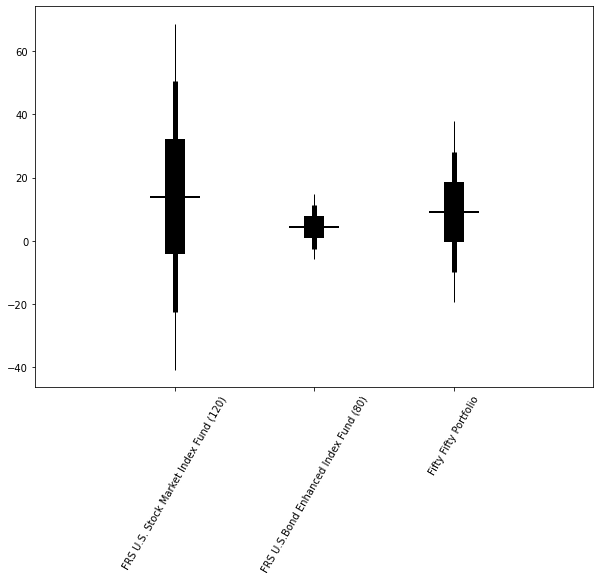

In [15]:
# Display Results
summary = bb.summary(df, portfolio_option, annual_ret, std_dev, sharpe_ratio)
summary

### Optimize Portfolio

In [16]:
# Optimize sharpe ratio while allowing a min_annual_rate and/or max_black_swan.
# Setting min_annual_return and max_black_swan to None optimizes absolute sharpe_ratio
# without regard to these quantities.
min_annual_return = 10
max_black_swan = None
bb.DEBUG = False

if run_portfolio_optimizer:
    bb.optimizer(df, portfolio_option, risk_free_rate, min_annual_return, max_black_swan)

Running optimizer.........

Fifty Fifty Portfolio Metrics:
    max_sharpe_ratio: 0.91
    annual_return: 9.95
    std_dev: 10.89
    black_swan: -22.73

Fifty Fifty Portfolio Weights:
    FRS U.S. Stock Market Index Fund (120): 0.58
    FRS U.S.Bond Enhanced Index Fund (80): 0.42



### use_sharpe_ratio_adjusted_weights
Recommend that you also try setting use_sharpe_ratio_adjusted_weights=True and compare
those results with the Optimized Portfolio.  
It tends to produce a higher annual_return while
keeping the allocations more balanced than the Optimizer.